# Evaluation: Precision & Recall
## Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics
### We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 


In [110]:
import matplotlib.pyplot as plt
import matplotlib.cm as matplotcm

In [111]:
import numpy as np
from sklearn.datasets import fetch_openml
#from sklearn.datasets import load_digits
#mnist = load_digits()
mnist = fetch_openml('mnist_784')
X, y = mnist['data'], mnist['target']

### Now take a look at the shapes of the X and y matricies 

In [112]:
X.shape

(70000, 784)

In [113]:
y.shape

(70000,)

### Now, let's pick one entry and see what number is written. Use indexing to pick the 36000th digit

In [114]:
eg_num = X.iloc[[36000-1],:].values
eg_num

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  16.,  29., 154.,
        254., 243., 135.,  25.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 

### You can use the .reshape(28,28) function and plt.imshow() function with the parameters cmap = matplotlib.cm.binary, interpolation="nearest" to make a plot of the number. Be sure to import matplotlib!

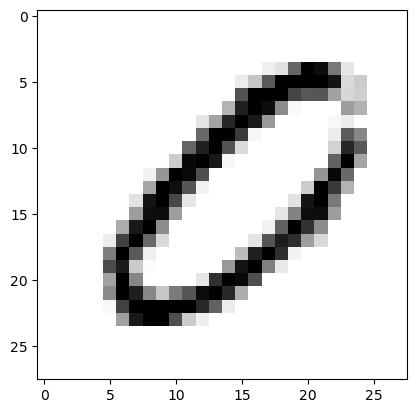

In [115]:
plt.imshow(eg_num.reshape(28,28), cmap=matplotcm.binary, interpolation="nearest")

### Use indexing to see if what the plot shows matches with the outcome of the 36000th index

In [116]:
eg_num_reshape = eg_num.reshape(28,28)

In [117]:
eg_num_reshape[23,10]

177.0

In [118]:
eg_num_reshape[15,8]

241.0

### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training, and the rest for training.

In [119]:
from sklearn.model_selection import train_test_split

def split_data(X, y, test_size=0.2, random_state=42):
    """
    Split the data into training and testing sets using sklearn's train_test_split function.
    
    Parameters:
    X (pandas DataFrame): The feature matrix
    y (pandas Series): The target variable
    test_size (float): The proportion of data to include in the test set
    random_state (int): The random seed to use for reproducibility
    
    Returns:
    X_train (pandas DataFrame): The feature matrix for the training set
    X_test (pandas DataFrame): The feature matrix for the testing set
    y_train (pandas Series): The target variable for the training set
    y_test (pandas Series): The target variable for the testing set
    """
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    return X_train, X_test, y_train, y_test

In [120]:
yindex = y.astype("str")


In [121]:
X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]


### We are going to make a two-class classifier, so lets restrict to just one number, for example 5s. Do this by defining a new y training and y testing sets for just the number 5

In [122]:
#y_train_5 = y_train.apply(lambda x: 1 if x=="5" else 0)

In [123]:
#y5_train = np.where(y_train == '5', 1, 0)


In [124]:
#y_train_5

In [125]:
#y_train_5.value_counts()

In [126]:
#y_test_5 = y_test.apply(lambda x: 1 if x=="5" else 0)

In [127]:
#y_train_5=np.where(y_train=='5', '5', '0')
#y_test_5=np.where(y_test=='5', '5', '0')

In [132]:
y_train_5 = np.where(y_train == '5', 1, 0)
y_test_5 = np.where(y_test == '5',1, 0)

### Lets train a logistic regression to predict if a number is a 5 or not (remember to use the 'just 5s' y training set!)

In [133]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [130]:
log_reg = LogisticRegression()

### Power transform

In [134]:
trans = PowerTransformer()
trans.fit(X_train)
X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

c:\Users\marci\.conda\envs\danalysis\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [135]:
log_reg.fit(X_train_mod,y_train_5)

c:\Users\marci\.conda\envs\danalysis\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [136]:
y_pred_train_log = log_reg.predict(X_train_mod)
y_pred_test_log = log_reg.predict(X_test_mod)

### Does the classifier predict correctly the 36000th digit we picked before?

In [140]:
y_pred_train_log[36000]

0

In [139]:
y_train_5[36000]

0

In [141]:
y_pred_test_log

array([0, 0, 0, ..., 0, 1, 0])

### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below, and call it using: never_5_clf = Never5Classifier()

In [142]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()

### Now lets fit and predict on the testing set using our never 5 Classifier

In [143]:
never_5_clf.fit(X_train_mod, y_train_5)

In [146]:
never_5_pred_train = never_5_clf.predict(X_train_mod)
never_5_pred_test = never_5_clf.predict(X_test_mod)


### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

c:\Users\marci\.conda\envs\danalysis\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\Users\marci\.conda\envs\danalysis\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


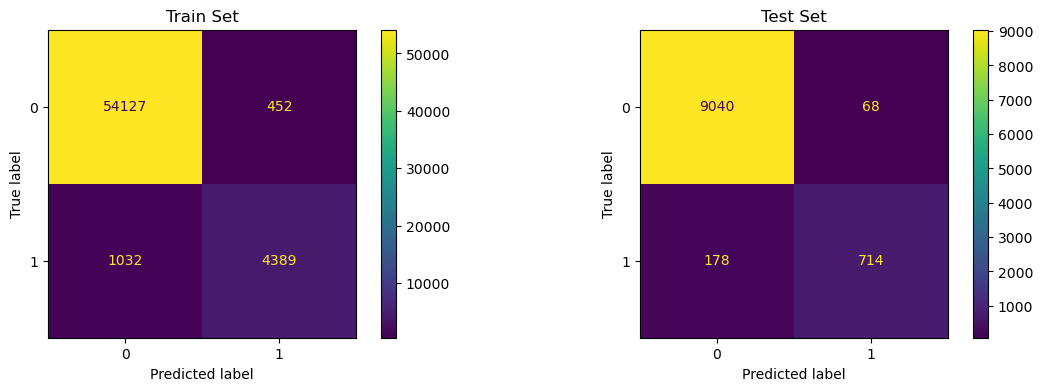

In [145]:
fig, ax = plt.subplots(1,2, figsize=(14,4))

plot_confusion_matrix(log_reg,X_train_mod,y_train_5,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

plot_confusion_matrix(log_reg,X_test_mod,y_test_5,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

In [177]:
import pandas as pd
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix



In [150]:
performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train_5, y_pred_train_log),
                                         precision_score(y_train_5, y_pred_train_log),
                                         recall_score(y_train_5, y_pred_train_log)],
                               'Test': [accuracy_score(y_test_5, y_pred_test_log),
                                        precision_score(y_test_5, y_pred_test_log),
                                        recall_score(y_test_5, y_pred_test_log)]})

display(performance_log)

,Error_metric,Train,Test
0,Accuracy,0.975267,0.975400
1,Precision,0.906631,0.913043
2,Recall,0.809629,0.800448


In [186]:
y_train_5_bool=np.array(y_train_5, dtype=bool)
y_test_5_bool=np.array(y_test_5, dtype=bool)



In [160]:
never_5_pred_test

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [171]:
cm = confusion_matrix( never_5_pred_train, y_train_5)
cm

array([[54579,  5421],
       [    0,     0]], dtype=int64)

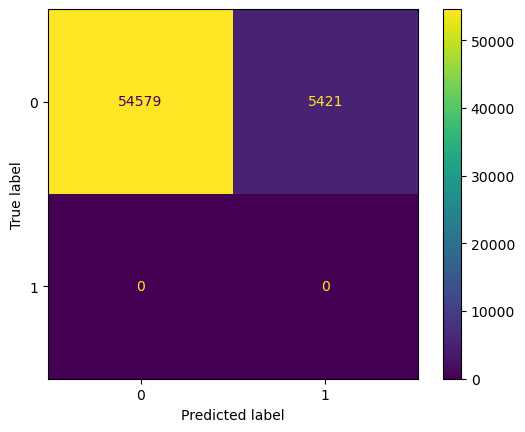

In [175]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                            display_labels=[0,1])
disp.plot()

In [181]:
cm2 = confusion_matrix( never_5_pred_test, y_test_5)
cm2

array([[9108,  892],
       [   0,    0]], dtype=int64)

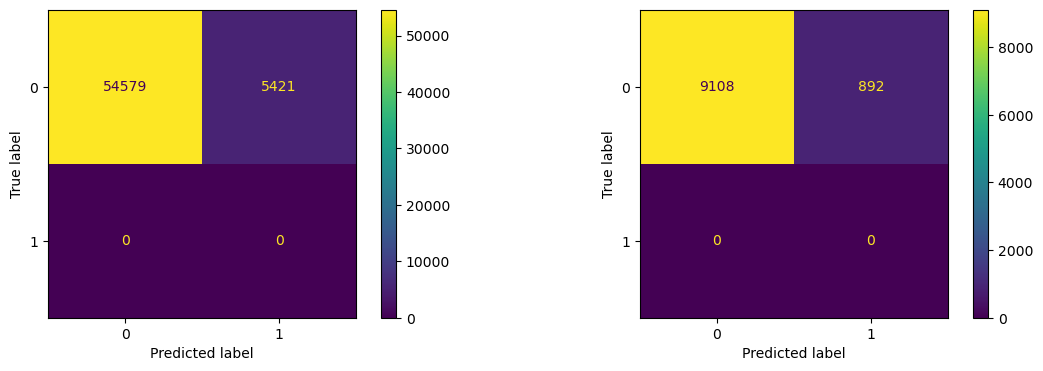

In [184]:
fig, axes = plt.subplots(1,2,figsize=(14,4))
ax1 = axes.flatten()[0]
ax2 = axes.flatten()[1]
ConfusionMatrixDisplay(confusion_matrix=cm,
                            display_labels=[0,1]).plot(ax=ax1)
ConfusionMatrixDisplay(confusion_matrix=cm2,
                            display_labels=[0,1]).plot(ax=ax2)

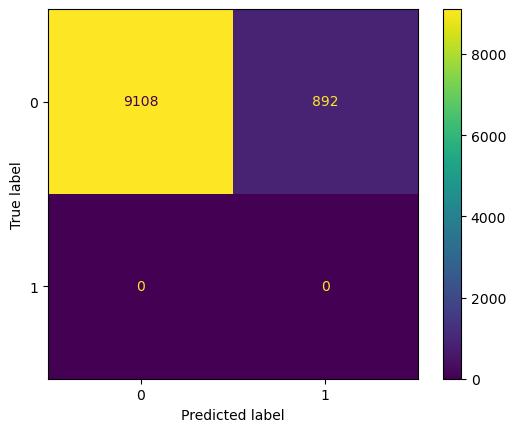

In [169]:
cm = confusion_matrix( never_5_pred_test, y_test_5)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                            display_labels=[0,1])
disp.plot()

In [190]:
performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train_5_bool, never_5_pred_train),
                                         precision_score(y_train_5_bool, never_5_pred_train),
                                         recall_score(y_train_5_bool, never_5_pred_train)],
                               'Test': [accuracy_score(y_test_5_bool, never_5_pred_test),
                                        precision_score(y_test_5_bool, never_5_pred_test),
                                        recall_score(y_test_5_bool, never_5_pred_test)]})

display(performance_log)

c:\Users\marci\.conda\envs\danalysis\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\marci\.conda\envs\danalysis\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Error_metric,Train,Test
0,Accuracy,0.90965,0.9108
1,Precision,0.00000,0.0000
2,Recall,0.00000,0.0000


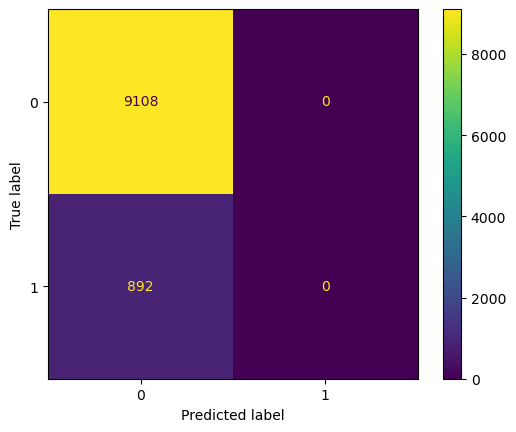

In [189]:
cm = confusion_matrix( y_test_5_bool, never_5_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                            display_labels=[0,1])
disp.plot()

### What are the differences you see? Without knowing what each model is, what can these metrics tell you about how well each works?

### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each

In [195]:
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import RocCurveDisplay

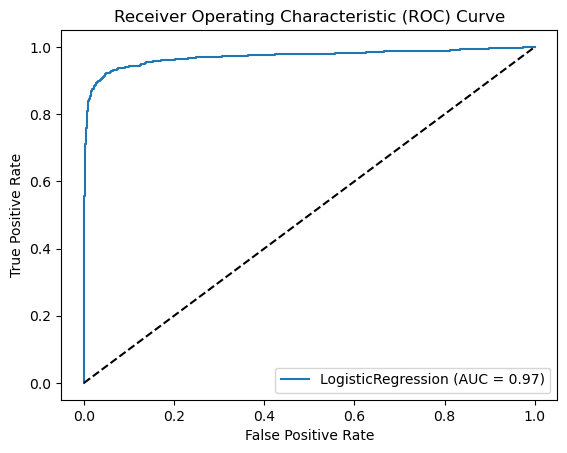

In [202]:
RocCurveDisplay.from_estimator(log_reg, X_test_mod, y_test_5)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

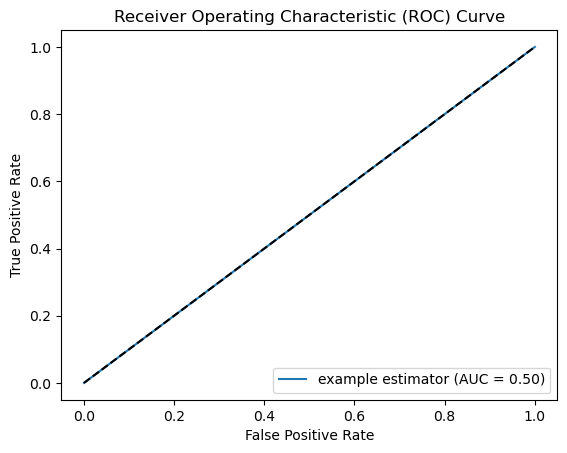

In [201]:
fpr, tpr, thresholds = roc_curve(y_test_5_bool, never_5_pred_test)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                   estimator_name='example estimator')
display.plot()
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

### Now find the roc_auc_score for each. 

### What does this metric tell you? Which classifier works better with this metric in mind?